In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [54]:
sns.get_dataset_names()  # list of dataset available in sns

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic',
 'anagrams',
 'anagrams',
 'anscombe',
 'anscombe',
 'attention',
 'attention',
 'brain_networks',
 'brain_networks',
 'car_crashes',
 'car_crashes',
 'diamonds',
 'diamonds',
 'dots',
 'dots',
 'dowjones',
 'dowjones',
 'exercise',
 'exercise',
 'flights',
 'flights',
 'fmri',
 'fmri',
 'geyser',
 'geyser',
 'glue',
 'glue',
 'healthexp',
 'healthexp',
 'iris',
 'iris',
 'mpg',
 'mpg',
 'penguins',
 'penguins',
 'planets',
 'planets',
 'seaice',
 'seaice',
 'taxis',
 'taxis',
 'tips',
 'tips',
 'titanic',
 'titanic',
 'anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'plan

In [55]:
df = sns.load_dataset('flights')  # load flights dataset
df["yearmonth"]= "01-" + df['month'].astype(str)+ "-" + df['year'].astype(str)
df.head()

,year,month,passengers,yearmonth
0,1949,Jan,112,01-Jan-1949
1,1949,Feb,118,01-Feb-1949
2,1949,Mar,132,01-Mar-1949
3,1949,Apr,129,01-Apr-1949
4,1949,May,121,01-May-1949


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   year        144 non-null    int64   
 1   month       144 non-null    category
 2   passengers  144 non-null    int64   
 3   yearmonth   144 non-null    object  
dtypes: category(1), int64(2), object(1)
memory usage: 4.0+ KB


In [57]:
df["yearmonth"]= pd.to_datetime("01-" + df['month'].astype(str)+ "-" + df['year'].astype(str))
df.head()

,year,month,passengers,yearmonth
0,1949,Jan,112,1949-01-01
1,1949,Feb,118,1949-02-01
2,1949,Mar,132,1949-03-01
3,1949,Apr,129,1949-04-01
4,1949,May,121,1949-05-01


In [58]:
# set yearmonth as index
df.set_index("yearmonth", inplace=True)

<Axes: xlabel='yearmonth', ylabel='passengers'>

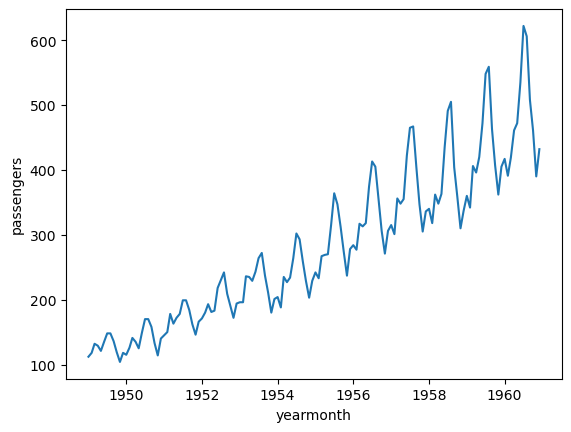

In [59]:
sns.lineplot(data=df, x=df.index , y=df.passengers)

### Check that data is stationary or not

In [60]:
df['roll_mean']=df.passengers.rolling(window=12).mean()
df['roll_std']=df.passengers.rolling(window=12).std()
df.head()

,year,month,passengers,roll_mean,roll_std
yearmonth,,,,,
1949-01-01,1949,Jan,112,NaN,NaN
1949-02-01,1949,Feb,118,NaN,NaN
1949-03-01,1949,Mar,132,NaN,NaN
1949-04-01,1949,Apr,129,NaN,NaN
1949-05-01,1949,May,121,NaN,NaN


<Axes: xlabel='yearmonth', ylabel='passengers'>

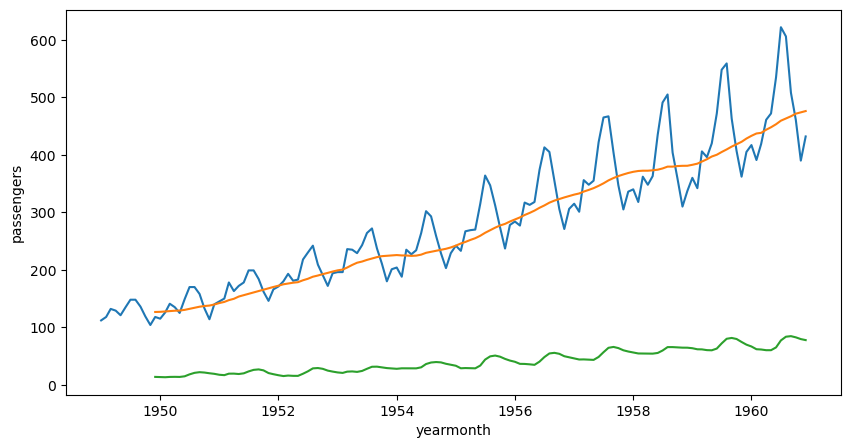

In [61]:
plt.figure(figsize=(10,5))
sns.lineplot(data=df, x=df.index, y=df.passengers)
sns.lineplot(data=df, x=df.index, y=df.roll_mean)
sns.lineplot(data=df, x=df.index, y=df.roll_std)

In [62]:
# means are varying and std may be constant

In [63]:
#ADF Test
from statsmodels.tsa.stattools import adfuller

In [64]:
adftest = adfuller(df['passengers'], autolag='AIC',)

In [65]:
adftest

(0.8153688792060547,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [66]:
stats =pd.Series(adftest[0:4], index=['test statistics', 'p-value','#lags used', "Number of observation used"])
stats

test statistics                 0.815369
p-value                         0.991880
#lags used                     13.000000
Number of observation used    130.000000
dtype: float64

In [67]:
for key, values in adftest[4].items():
    print('criticality' ":", key, ":", values)

criticality: 1% : -3.4816817173418295
criticality: 5% : -2.8840418343195267
criticality: 10% : -2.578770059171598


In [68]:
# It show that the model is not stationary 
# we know that test statistics < criticality value which means data is stationary

#### How to make data stationary
Three-ways made data stationary

1. Time Shift :
2. Log : find log of depend variable
3. Square root : find  Square root of depend variable
4. cube root :find cube of depend variable
5. LOG&SQRT : log and square root
6. LOG&CBRT: Log and cube root
7. log&sqrt&timeshift

In [69]:
def test_stationary(dataFrame, var):
    dataFrame['roll_mean']=dataFrame[var].rolling(window=12).mean()
    dataFrame['roll_std']=dataFrame[var].rolling(window=12).std()
    
    from statsmodels.tsa.stattools import adfuller
    adftest = adfuller(dataFrame[var], autolag='AIC',)
    stats =pd.Series(adftest[0:4], index=['test statistics', 'p-value','#lags used', "Number of observation used"])
    print(stats)
    
    
    for key, values in adftest[4].items():
        print('criticality' ":", key, ":", values)
    
    sns.lineplot(data=dataFrame, x=dataFrame.index, y=var)
    sns.lineplot(data=dataFrame, x=dataFrame.index, y='roll_mean')
    sns.lineplot(data=dataFrame, x=dataFrame.index, y='roll_std')
    

test statistics                 0.815369
p-value                         0.991880
#lags used                     13.000000
Number of observation used    130.000000
dtype: float64
criticality: 1% : -3.4816817173418295
criticality: 5% : -2.8840418343195267
criticality: 10% : -2.578770059171598


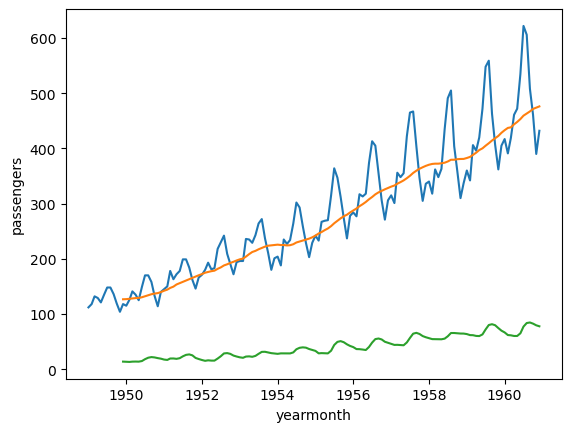

In [70]:
test_stationary(df, 'passengers')

In [71]:
air_df=df[['passengers']]
air_df.head()

,passengers
yearmonth,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


# Time shift

In [72]:
air_df['shift'] = air_df.passengers.shift() # bydefault is shift by 1
air_df.head()

,passengers,shift
yearmonth,,
1949-01-01,112,NaN
1949-02-01,118,112.0
1949-03-01,132,118.0
1949-04-01,129,132.0
1949-05-01,121,129.0


In [73]:
# now find difference 
air_df['shiftDiff']= air_df['passengers']- air_df['shift']
air_df.head()

,passengers,shift,shiftDiff
yearmonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,112.0,6.0
1949-03-01,132,118.0,14.0
1949-04-01,129,132.0,-3.0
1949-05-01,121,129.0,-8.0


test statistics                -2.829267
p-value                         0.054213
#lags used                     12.000000
Number of observation used    130.000000
dtype: float64
criticality: 1% : -3.4816817173418295
criticality: 5% : -2.8840418343195267
criticality: 10% : -2.578770059171598


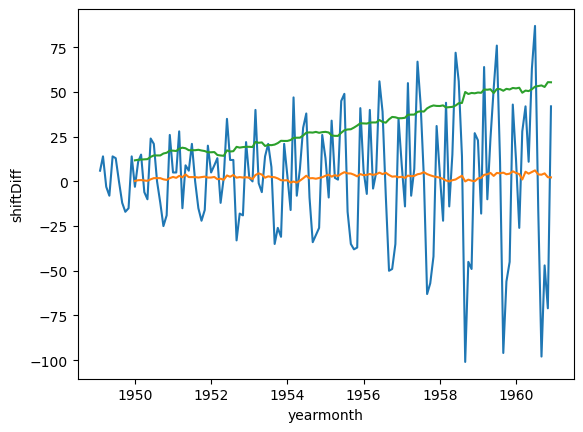

In [74]:
# Check stationary again
test_stationary(air_df.dropna(), 'shiftDiff')

## Log : find log of depend variable

In [75]:
log_df=df[['passengers']]
log_df.head()

,passengers
yearmonth,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [76]:
log_df['log']=np.log(log_df['passengers'])

In [77]:
log_df

,passengers,log
yearmonth,,
1949-01-01,112,4.718499
1949-02-01,118,4.770685
1949-03-01,132,4.882802
1949-04-01,129,4.859812
1949-05-01,121,4.795791
...,...,...
1960-08-01,606,6.406880
1960-09-01,508,6.230481
1960-10-01,461,6.133398


test statistics                -1.717017
p-value                         0.422367
#lags used                     13.000000
Number of observation used    130.000000
dtype: float64
criticality: 1% : -3.4816817173418295
criticality: 5% : -2.8840418343195267
criticality: 10% : -2.578770059171598


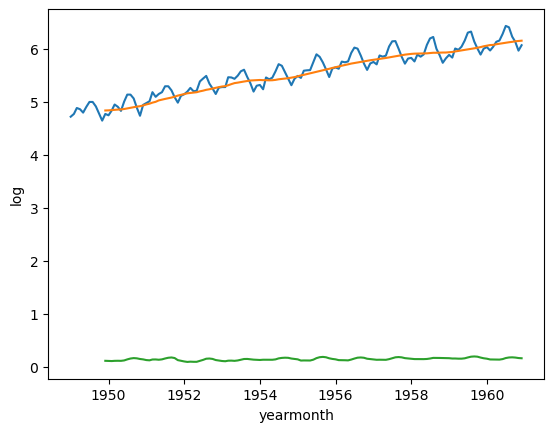

In [78]:
test_stationary(log_df,'log')

## SQRT

In [79]:
sqrt_df=df[['passengers']]
sqrt_df.head()

,passengers
yearmonth,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [80]:
sqrt_df['sqrt'] = np.sqrt(df[['passengers']])

In [81]:
sqrt_df.head()

,passengers,sqrt
yearmonth,,
1949-01-01,112,10.583005
1949-02-01,118,10.862780
1949-03-01,132,11.489125
1949-04-01,129,11.357817
1949-05-01,121,11.000000


test statistics                -0.345854
p-value                         0.918754
#lags used                     13.000000
Number of observation used    130.000000
dtype: float64
criticality: 1% : -3.4816817173418295
criticality: 5% : -2.8840418343195267
criticality: 10% : -2.578770059171598


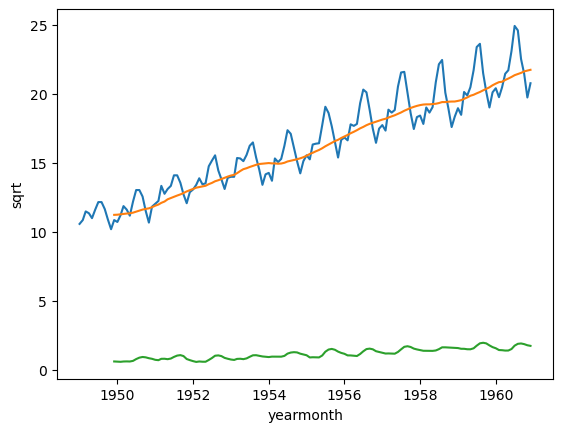

In [82]:
# Check stationary again
test_stationary(sqrt_df, 'sqrt')

## CBRT : Cube Root

In [83]:
cbrt_df = df[['passengers']]
cbrt_df.head()

,passengers
yearmonth,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [84]:
cbrt_df['cbrt'] =np.cbrt(cbrt_df['passengers'])

In [85]:
cbrt_df.head()

,passengers,cbrt
yearmonth,,
1949-01-01,112,4.820285
1949-02-01,118,4.904868
1949-03-01,132,5.091643
1949-04-01,129,5.052774
1949-05-01,121,4.946087


test statistics                -0.810035
p-value                         0.816157
#lags used                     13.000000
Number of observation used    130.000000
dtype: float64
criticality: 1% : -3.4816817173418295
criticality: 5% : -2.8840418343195267
criticality: 10% : -2.578770059171598


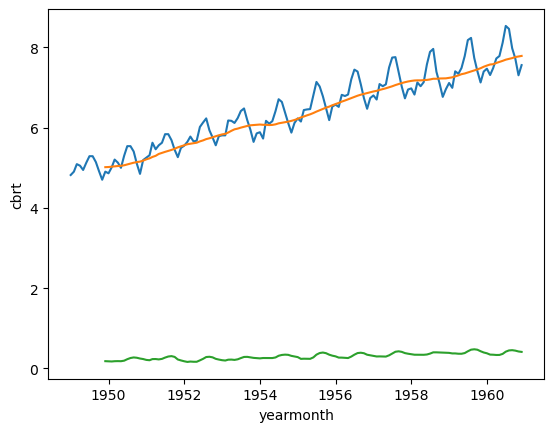

In [86]:
# Check stationary again
test_stationary(cbrt_df, 'cbrt')

In [87]:
# LogSquare root

In [88]:
log_df2 = log_df[['passengers', 'log']]
log_df2.head()

,passengers,log
yearmonth,,
1949-01-01,112,4.718499
1949-02-01,118,4.770685
1949-03-01,132,4.882802
1949-04-01,129,4.859812
1949-05-01,121,4.795791


In [89]:
log_df2['logsqrt'] = np.sqrt(log_df2['log'])

In [90]:
log_df2.head()

,passengers,log,logsqrt
yearmonth,,,
1949-01-01,112,4.718499,2.172211
1949-02-01,118,4.770685,2.184190
1949-03-01,132,4.882802,2.209706
1949-04-01,129,4.859812,2.204498
1949-05-01,121,4.795791,2.189929


test statistics                -1.942528
p-value                         0.312326
#lags used                     13.000000
Number of observation used    130.000000
dtype: float64
criticality: 1% : -3.4816817173418295
criticality: 5% : -2.8840418343195267
criticality: 10% : -2.578770059171598


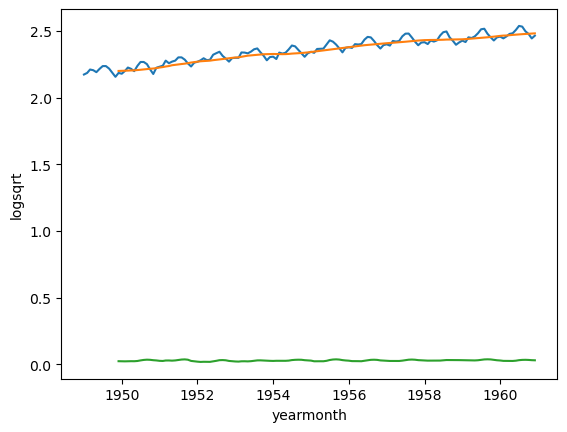

In [91]:
# Check stationary again
test_stationary(log_df2, 'logsqrt')

## log&sqrt&timeshift

In [92]:
log_df2 = log_df[['passengers', 'log']]
log_df2['logsqrt'] = np.sqrt(log_df2['log'])
log_df2['logshiftdiff']=log_df2['logsqrt']-log_df2['logsqrt'].shift()
log_df2.head()

,passengers,log,logsqrt,logshiftdiff
yearmonth,,,,
1949-01-01,112,4.718499,2.172211,NaN
1949-02-01,118,4.770685,2.184190,0.011979
1949-03-01,132,4.882802,2.209706,0.025517
1949-04-01,129,4.859812,2.204498,-0.005208
1949-05-01,121,4.795791,2.189929,-0.014569


test statistics                -2.611019
p-value                         0.090741
#lags used                     14.000000
Number of observation used    128.000000
dtype: float64
criticality: 1% : -3.4825006939887997
criticality: 5% : -2.884397984161377
criticality: 10% : -2.578960197753906


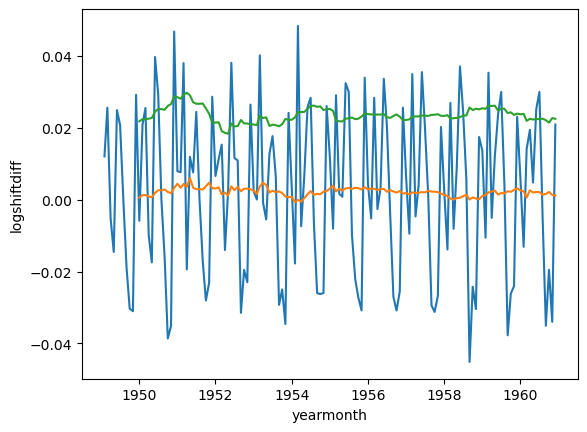

In [93]:
# Check stationary again
test_stationary(log_df2.dropna(), 'logshiftdiff')

#  Note 2
Build Model with base dataset
**ARIMA** : Autoregressive Integrated Moving Average
1. AR -- Autoregressive : P  Find out by PACF (Partial autocorrelation function : Only direct effect of vaue of previous time lags)
2.  I  -- Integrated : d (Which interval you shift the data its you d, example you shift by 12 so your d=12)
3. MA -- Moving Average : q Find out by AUF

In [94]:
#Autocorrelation: Relation of the variable with previous time period value(Lags) : Direct and indirect effect of previous time Lags

In [100]:
airP=df[['passengers']].copy(deep=True)
airP['firstdiff'] = airP['passengers'].diff()
airP['diff12'] = airP['passengers'].diff(12)

In [101]:
airP.head()

,passengers,firstdiff,diff12
yearmonth,,,
1949-01-01,112,NaN,NaN
1949-02-01,118,6.0,NaN
1949-03-01,132,14.0,NaN
1949-04-01,129,-3.0,NaN
1949-05-01,121,-8.0,NaN


In [117]:
# import arima model
from statsmodels.tsa.arima_model import ARMA

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

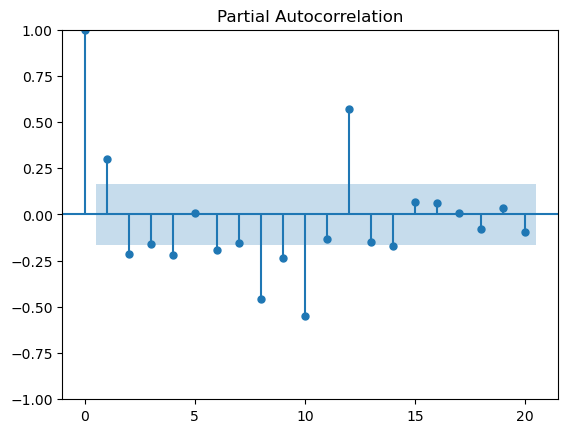

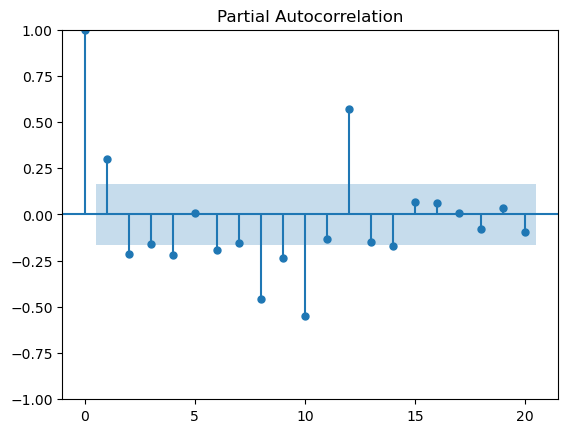

In [118]:
plot_pacf(airP['firstdiff'].dropna(), lags=20) #for p value

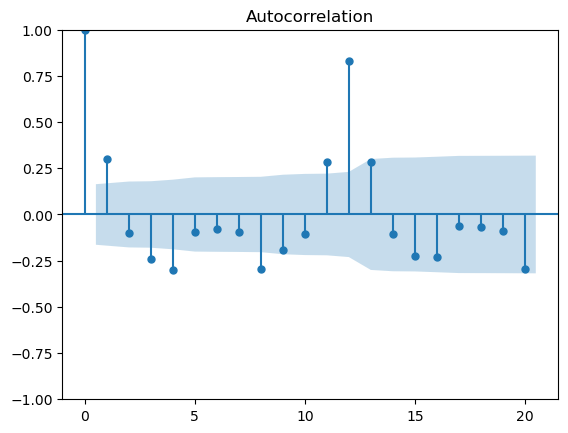

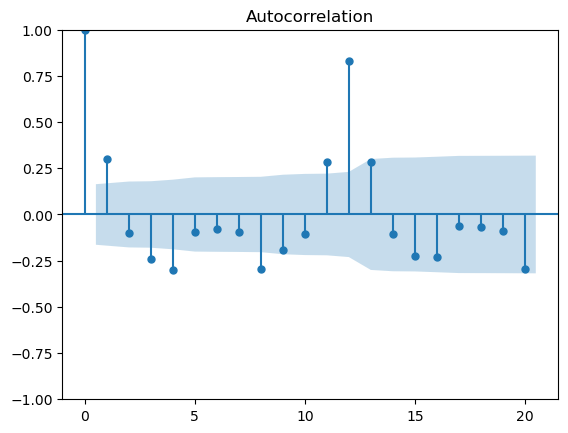

In [119]:
plot_acf(airP['firstdiff'].dropna(), lags=20)

In [120]:
# p=1,d=1,q=3

In [121]:
train=airP[:round(len(airP)*70/100)]
test=airP[round(len(airP)*70/100):]

train.tail()

,passengers,firstdiff,diff12
yearmonth,,,
1957-01-01,315,9.0,31.0
1957-02-01,301,-14.0,24.0
1957-03-01,356,55.0,39.0
1957-04-01,348,-8.0,35.0
1957-05-01,355,7.0,37.0


In [123]:
import statsmodels.api as sm


In [145]:
model = sm.tsa.arima.ARIMA(train['passengers'], order=(1,1,3))
model_fit=model.fit()
prediction = model_fit.predict(start=test.index[0], end=test.index[-1])
airP['arimaPred']=prediction
airP.tail()

,passengers,firstdiff,diff12,arimaPred
yearmonth,,,,
1960-08-01,606,-16.0,47.0,341.111333
1960-09-01,508,-98.0,45.0,341.111333
1960-10-01,461,-47.0,54.0,341.111333
1960-11-01,390,-71.0,28.0,341.111333
1960-12-01,432,42.0,27.0,341.111333


<Axes: xlabel='yearmonth', ylabel='passengers'>

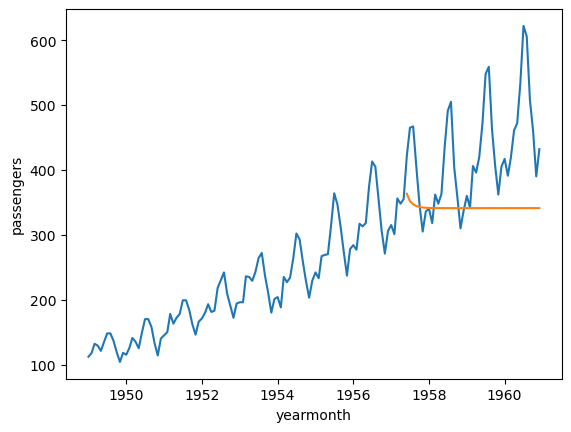

In [146]:
airP.dropna()

sns.lineplot(data=airP, x=airP.index, y='passengers')
sns.lineplot(data=airP, x=airP.index, y='arimaPred')

In [147]:
from sklearn.metrics import mean_squared_error

In [148]:
np.sqrt(mean_squared_error(test['passengers'], prediction))

111.1101033600321

In [149]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [150]:
airP.head()

,passengers,firstdiff,diff12,arimaPred
yearmonth,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,NaN,NaN
1949-04-01,129,-3.0,NaN,NaN
1949-05-01,121,-8.0,NaN,NaN


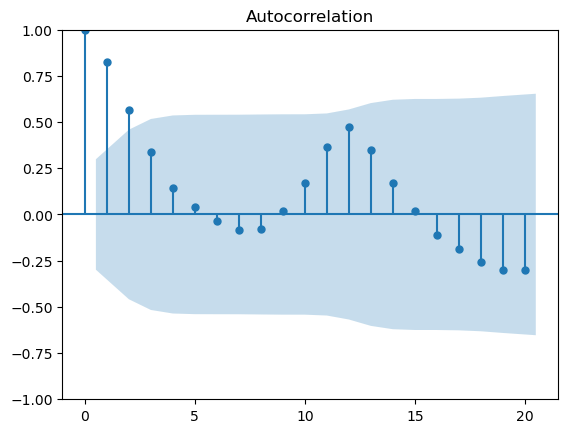

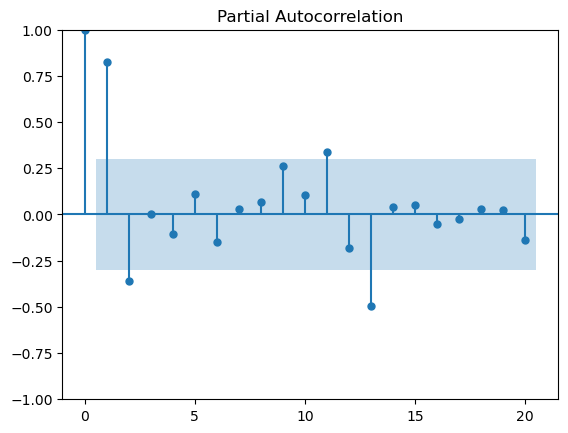

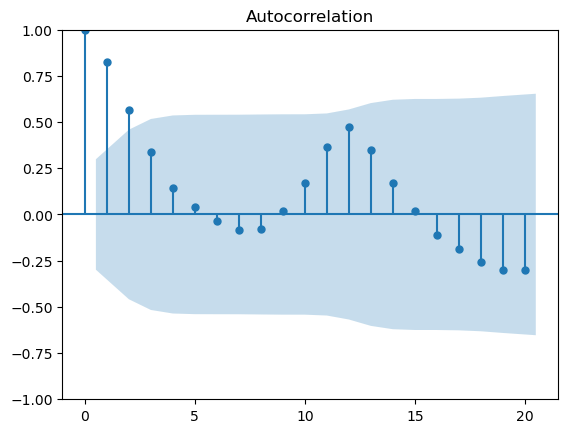

In [159]:
plot_pacf(airP['arimaPred'].dropna(), lags=20)
plot_acf(airP['arimaPred'].dropna(), lags=20)

In [153]:
model = SARIMAX(train['passengers'],order=(1,1,3), seasonal_order=(1,1,3,12))
model_fit=model.fit()
prediction = model_fit.predict(start=test.index[0], end=test.index[-1])
airP['sarimaxPred']=prediction
airP.tail()

,passengers,firstdiff,diff12,arimaPred,sarimaxPred
yearmonth,,,,,
1960-08-01,606,-16.0,47.0,599.426771,599.426771
1960-09-01,508,-98.0,45.0,534.543687,534.543687
1960-10-01,461,-47.0,54.0,479.572989,479.572989
1960-11-01,390,-71.0,28.0,431.914012,431.914012
1960-12-01,432,42.0,27.0,477.423984,477.423984


<Axes: xlabel='yearmonth', ylabel='passengers'>

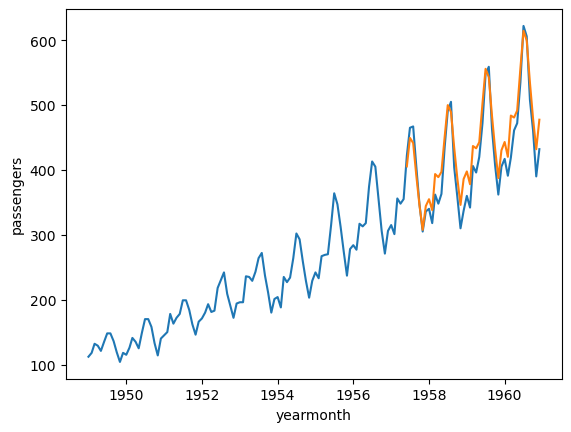

In [156]:
airP.dropna()
sns.lineplot(data=airP, x=airP.index, y='passengers')
sns.lineplot(data=airP, x=airP.index, y='sarimaxPred')

In [158]:
np.sqrt(mean_squared_error(test['passengers'], prediction))

27.679257539578593

In [160]:
# future dates

airP.tail()

,passengers,firstdiff,diff12,arimaPred,sarimaxPred
yearmonth,,,,,
1960-08-01,606,-16.0,47.0,599.426771,599.426771
1960-09-01,508,-98.0,45.0,534.543687,534.543687
1960-10-01,461,-47.0,54.0,479.572989,479.572989
1960-11-01,390,-71.0,28.0,431.914012,431.914012
1960-12-01,432,42.0,27.0,477.423984,477.423984


In [168]:
future_date= pd.DataFrame(pd.date_range(start='1961-01-01', end = '1962-12-01', freq="MS"), columns=['Dates'])

In [169]:
future_date.set_index('Dates', inplace=True)

In [170]:
future_date.head()

""
Dates
1961-01-01
1961-02-01
1961-03-01
1961-04-01
1961-05-01


In [171]:
model_fit.predict(start=future_date.index[0], end=future_date.index[-1])

1961-01-01    491.475342
1961-02-01    465.641858
1961-03-01    533.732119
1961-04-01    531.199980
1961-05-01    543.252928
1961-06-01    613.613707
1961-07-01    675.950207
1961-08-01    658.766667
1961-09-01    589.071139
1961-10-01    530.171155
1961-11-01    479.458701
1961-12-01    527.704433
1962-01-01    542.905067
1962-02-01    514.096288
1962-03-01    586.650689
1962-04-01    584.576941
1962-05-01    597.896691
1962-06-01    673.548087
1962-07-01    740.121805
1962-08-01    720.888664
1962-09-01    646.473945
1962-10-01    583.720816
1962-11-01    530.014055
1962-12-01    580.942534
Freq: MS, Name: predicted_mean, dtype: float64

<Axes: >

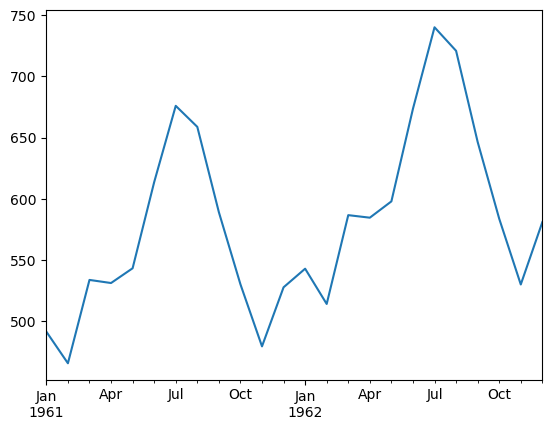

In [172]:
model_fit.predict(start=future_date.index[0], end=future_date.index[-1]).plot()

<Axes: xlabel='yearmonth', ylabel='passengers'>

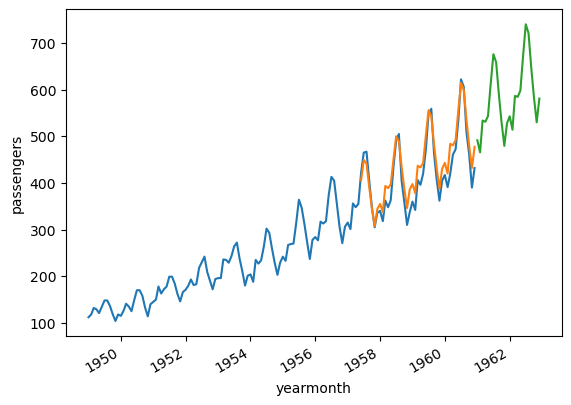

In [173]:
airP.dropna()
sns.lineplot(data=airP, x=airP.index, y='passengers')
sns.lineplot(data=airP, x=airP.index, y='sarimaxPred')
model_fit.predict(start=future_date.index[0], end=future_date.index[-1]).plot()